In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score


base_path = "D:/manualCDmanagement/codes/Projects/VMs/skl algorithms/Logistic Regression/diabetes.v1/Storage"
file_name = "heart_disease_dataset.csv"
file_path = os.path.join(base_path, file_name)

df = pd.read_csv(file_path) 

print(df.head())

df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Smoking'] = df['Smoking'].map({'Current': 2, 'Never': 0, "Former": 1})
df['Family History'] = df['Family History'].map({'Yes': 1, 'No': 0})
df['Diabetes'] = df['Diabetes'].map({'Yes': 1, 'No': 0})
df['Obesity'] = df['Obesity'].map({'Yes': 1, 'No': 0})
df['Exercise Induced Angina'] = df['Exercise Induced Angina'].map({'Yes': 1, 'No': 0})
df['Chest Pain Type'] = df['Chest Pain Type'].map({'Typical Angina': 3, 'Atypical Angina': 2, 'Non-anginal Pain': 1, 'Asymptomatic': 0})
df['Alcohol Intake'] = df['Alcohol Intake'].fillna('None').map({'Heavy': 2, 'Moderate': 1, 'None':1})


   Age  Gender  Cholesterol  Blood Pressure  Heart Rate  Smoking  \
0   75  Female          228             119          66  Current   
1   48    Male          204             165          62  Current   
2   53    Male          234              91          67    Never   
3   69  Female          192              90          72  Current   
4   62  Female          172             163          93    Never   

  Alcohol Intake  Exercise Hours Family History Diabetes Obesity  \
0          Heavy               1             No       No     Yes   
1            NaN               5             No       No      No   
2          Heavy               3            Yes       No     Yes   
3            NaN               4             No      Yes      No   
4            NaN               6             No      Yes      No   

   Stress Level  Blood Sugar Exercise Induced Angina   Chest Pain Type  \
0             8          119                     Yes   Atypical Angina   
1             9           70      

In [99]:

# # Exploratory Data Analysis (EDA)
# Check for missing values
# print(df.isnull().sum())

# # Summary statistics
# print(df.describe())



In [94]:


# # Correlation matrix
# corr_matrix = df.corr()
# plt.figure(figsize=(12, 8))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')

## Save image
# fig_name = "Correlation matrix.png"
# bp = base_path + "/Figures"
# save_to = os.path.join(bp, fig_name)
# # plt.savefig(save_to)
# plt.savefig(save_to, dpi=300, bbox_inches='tight')

# # plt.show()

In [2]:

# # Pairplot, dont ever run this piece
# sns.pairplot(df, hue='Smoking')
# plt.show()

# # Split the data into features and target
X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']

# # Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# # Make predictions on the test set
y_pred = model.predict(X_test)


In [3]:
# # Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.865
Confusion Matrix:
[[105  13]
 [ 14  68]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       118
           1       0.84      0.83      0.83        82

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200



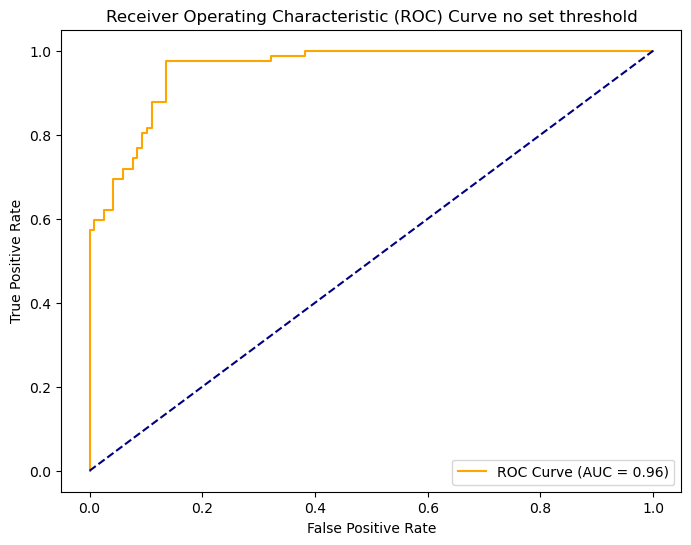

In [9]:

from sklearn.metrics import roc_curve, roc_auc_score

# Get probabilities for ROC curve
y_probs = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)



plt.show()


Accuracy: 0.865
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       118
           1       0.84      0.83      0.83        82

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200



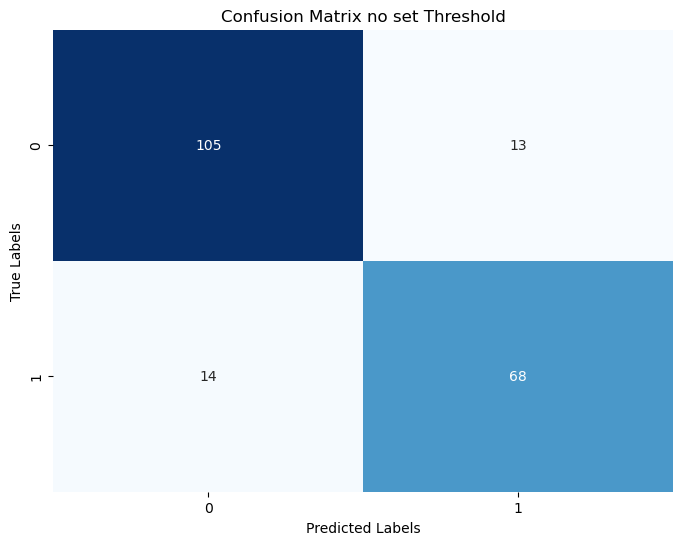

In [13]:
# Print classification report and accuracy
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(class_report)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix no set Threshold')

## Save image
fig_name = "Confusion Matrix no set Threshold.png"
bp = base_path + "/Figures"
save_to = os.path.join(bp, fig_name)
plt.savefig(save_to)
plt.savefig(save_to, dpi=300, bbox_inches='tight')

plt.show()
